# Auto-Green Score

Jacob Brown, Clay Juneau, Joshua Jung, Oliver Kao



# Problem
The climate is something that people are becoming more and more conscious about. We took that information along with knowing that buying a car is no small task, and from these these we decided to build a recommendation system for consumers who are buying cars. The people we are going to appeal to are people who care about the environment and care about how much they are spending and the quality of the car.

The first part of our project was deciding what data we wanted to use to make our claim. We knew that we wanted to find csv data that would be easy to clean and use. We also wanted to find data on cars that had the features, MSRP, and environmental effect of cars. We were able to find data that was on Kaggle that had car features along with MSRP and the most recent year for the data from Kaggle was 2017. We had to select 2017 for the year from the data we got from Kaggle. From that we were able to find environmental effects of cars from Greenhouse gas score that was available on Fuel Economy gov. We decided that from both of these data sets that we would have sufficient information to conduct our analysis and create a recommendation system. 

## Ingesting Data

In [1]:
import pandas as pd
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
epaData = pd.read_excel("all_alpha_17.xlsx")
epaData.drop(['Cert Region', 'Stnd', 'Stnd Description', 'Underhood ID'], axis=1, inplace = True)
epaData

,Model,Displ,Cyl,Trans,Drive,Fuel,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,small car,6,25,35,29,7,Yes,309
1,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,small car,6,25,35,29,7,Yes,309
2,ACURA MDX,3.0,6.0,AMS-7,4WD,Gasoline,small SUV,6,26,27,27,6,No,329
3,ACURA MDX,3.0,6.0,AMS-7,4WD,Gasoline,small SUV,6,26,27,27,6,No,329
4,ACURA MDX,3.5,6.0,SemiAuto-9,2WD,Gasoline,small SUV,6,19,27,22,5,No,404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2584,VOLVO XC 90,2.0,4.0,SemiAuto-8,4WD,Gasoline,standard SUV,6,22,25,23,5,No,384
2585,VOLVO XC 90,2.0,4.0,SemiAuto-8,4WD,Gasoline,standard SUV,6,20,25,22,5,No,399
2586,VOLVO XC 90,2.0,4.0,SemiAuto-8,4WD,Gasoline,standard SUV,6,22,25,23,5,No,384
2587,VOLVO XC 90,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,standard SUV,9,24/53,27/55,25/54,8,Yes,238


In [3]:
prices = pd.read_csv("data.csv")
prices

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [4]:
vehicles2017 = prices[prices["Year"] == 2017]
vehicles2017

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
32,FIAT,124 Spider,2017,premium unleaded (recommended),160.0,4.0,MANUAL,rear wheel drive,2.0,Performance,Compact,Convertible,35,26,819,27495
33,FIAT,124 Spider,2017,premium unleaded (recommended),160.0,4.0,MANUAL,rear wheel drive,2.0,Performance,Compact,Convertible,35,26,819,24995
34,FIAT,124 Spider,2017,premium unleaded (recommended),160.0,4.0,MANUAL,rear wheel drive,2.0,Performance,Compact,Convertible,35,26,819,28195
50,BMW,2 Series,2017,premium unleaded (recommended),335.0,6.0,AUTOMATIC,all wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,31,21,3916,46450
51,BMW,2 Series,2017,premium unleaded (recommended),335.0,6.0,AUTOMATIC,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Convertible,32,21,3916,49050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11876,GMC,Yukon,2017,flex-fuel (unleaded/E85),355.0,8.0,AUTOMATIC,rear wheel drive,4.0,"Flex Fuel,Performance",Large,4dr SUV,23,16,549,57315
11877,GMC,Yukon,2017,flex-fuel (unleaded/E85),355.0,8.0,AUTOMATIC,four wheel drive,4.0,"Flex Fuel,Performance",Large,4dr SUV,22,16,549,51530
11878,GMC,Yukon,2017,premium unleaded (recommended),420.0,8.0,AUTOMATIC,rear wheel drive,4.0,Performance,Large,4dr SUV,22,15,549,65965
11879,GMC,Yukon,2017,flex-fuel (unleaded/E85),355.0,8.0,AUTOMATIC,four wheel drive,4.0,"Flex Fuel,Performance",Large,4dr SUV,22,16,549,60315


____

## Cleaning Data

From here we needed to clean and combine the data so we would have consistent data that would be able to be easily analyzed. There were many columns within both data sets that meant the same thing but were written differently so we had to clean and combine data to match it up. For example the Kaggle data had "rear wheel drive","all wheel drive", "front wheel drive", and "four wheel drive" while the Fuel Economy data had "2WD" and "4WD". From these options we combined rear wheel and front wheel drive to 2WD and we combined all wheel and four wheel drive to 4WD.  We decided to convert the data to the Fuel Economy data set features because the were more generic. We also had to combine the fuel as well and it was a similar process as the wheel drive process except for the Hybrid and the Gasoline/Electricity feature. We had to see what cars in the Kaggle data had Hybrid in the Market Category and from there we converted that to Gasoline/Electricity.

### Driven_wheels (prices) ->  Drive (epaData)

In [5]:
vehicles2017.Driven_Wheels.unique()

array(['rear wheel drive', 'all wheel drive', 'front wheel drive',
       'four wheel drive'], dtype=object)

In [6]:
epaData["Drive"].unique()

array(['2WD', '4WD'], dtype=object)

In [7]:
vehicles2017.replace(["rear wheel drive",  "front wheel drive"], "2WD", inplace=True)
vehicles2017.replace(["all wheel drive",  "four wheel drive"], "4WD", inplace=True)
vehicles2017.Driven_Wheels.unique()

C:\Users\Joshua\.conda\envs\cs320\lib\site-packages\pandas\core\frame.py:4373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


array(['2WD', '4WD'], dtype=object)

### Engine Fuel Type ->  Fuel

In [8]:
vehicles2017["Engine Fuel Type"].unique()

array(['premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'premium unleaded (required)', 'diesel', 'regular unleaded',
       'electric', 'flex-fuel (premium unleaded recommended/E85)',
       'flex-fuel (unleaded/natural gas)'], dtype=object)

In [9]:
epaData["Fuel"].unique()

array(['Gasoline', 'Gasoline/Electricity', 'Ethanol/Gas', 'Diesel',
       'Electricity', 'Hydrogen', 'Ethanol'], dtype=object)

In [10]:
vehicles2017.replace(["regular unleaded",  "premium unleaded (required)", "premium unleaded (recommended)"], "Gasoline", inplace=True)
vehicles2017.replace(["flex-fuel (unleaded/E85)",  "flex-fuel (premium unleaded recommended/E85)","flex-fuel (unleaded/natural gas)"], "Ethanol/Gas", inplace=True)
vehicles2017.replace(["electric"], "Electric", inplace=True)
vehicles2017.replace(["diesel"], "Diesel", inplace=True)
vehicles2017["Engine Fuel Type"].unique()

array(['Gasoline', 'Ethanol/Gas', 'Diesel', 'Electric'], dtype=object)

In [11]:
vehicles2017["Market Category"].fillna("Nothing", inplace=True)
hybrid2 = vehicles2017["Market Category"].str.contains("Hybrid")
for i,row in vehicles2017[vehicles2017["Market Category"].str.contains("Hybrid")].iterrows():
    vehicles2017.loc[i, "Engine Fuel Type"] = "Gasoline/Electricity"
vehicles2017["Engine Fuel Type"].unique()

C:\Users\Joshua\.conda\envs\cs320\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
C:\Users\Joshua\.conda\envs\cs320\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


array(['Gasoline', 'Ethanol/Gas', 'Diesel', 'Electric',
       'Gasoline/Electricity'], dtype=object)

___

## Combining Datasets

Then to combine the data we had to create columns for the Fuel Economy data that did not exist in the data set, these were Make, Horsepower, Doors, and MSRP. We had to create slots for these and insert in the information into the Fuel Economy data from Kaggle data. There were duplicates in the Kaggle data for certain cars and what we decided to do is that with Models that had the same name and the same "Drive" we took the lowest MSRP and put that in out combined data and considered that the "Base Model" of the car. We did not include cars that cost over $100,000 because we wanted the recommednation system to be for common people. Then we took out data that had slashes because it would have been hard to compare the MPG data that had two different numbers and we did not have an easy way to get the correct MPG.

In [12]:
epaData["Make"] = pd.Series("", index=epaData.index)
epaData["Horsepower"] = pd.Series("", index=epaData.index)
epaData["Doors"] = pd.Series("", index=epaData.index)
epaData["MSRP"] = pd.Series(9999999, index=epaData.index)

In [13]:
for i, row in vehicles2017.iterrows():
    model = row.Model
    wheels = row.Driven_Wheels
    #epaData["Model"].str.contains(make.upper()) & & epaData["Drive"] == wheels
    for j, row2 in epaData[(epaData["Model"].str.contains(model.upper())) & (epaData["Drive"] == wheels)].iterrows():
        row1MSRP = int(row.MSRP)
        row2MSRP = int(row2.MSRP)
        if row1MSRP < row2MSRP:
            epaData.loc[j, "MSRP"] = row.MSRP
            epaData.loc[j, "Make"] = row.Make
            epaData.loc[j, "Horsepower"] = row["Engine HP"]
            epaData.loc[j, "Doors"] = row["Number of Doors"]

In [14]:
epaData = epaData[epaData["MSRP"] != 9999999]
epaData = epaData[epaData["MSRP"] < 100000]
epaData.drop_duplicates(inplace=True)

In [15]:
epaData = epaData[~epaData["Comb CO2"].str.contains("/")]
epaData = epaData[~epaData['Cmb MPG'].str.contains("/")]
epaData = epaData[~epaData['Hwy MPG'].str.contains("/")]
epaData = epaData[~epaData['City MPG'].str.contains("/")]
epaData.fillna(0, inplace=True)
epaData

,Model,Displ,Cyl,Trans,Drive,Fuel,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2,Make,Horsepower,Doors,MSRP
0,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,small car,6,25,35,29,7,Yes,309,Acura,201.0,4.0,27990
2,ACURA MDX,3.0,6.0,AMS-7,4WD,Gasoline,small SUV,6,26,27,27,6,No,329,Acura,290.0,4.0,45950
4,ACURA MDX,3.5,6.0,SemiAuto-9,2WD,Gasoline,small SUV,6,19,27,22,5,No,404,Acura,290.0,4.0,43950
5,ACURA MDX,3.5,6.0,SemiAuto-9,2WD,Gasoline,small SUV,6,20,27,23,5,No,391,Acura,290.0,4.0,43950
8,ACURA MDX,3.5,6.0,SemiAuto-9,4WD,Gasoline,small SUV,6,18,26,21,4,No,424,Acura,290.0,4.0,45950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2565,VOLVO V60,2.0,4.0,SemiAuto-8,4WD,Gasoline,station wagon,6,22,32,26,6,No,345,Volvo,302.0,4.0,48950
2566,VOLVO V60,2.0,4.0,SemiAuto-8,4WD,Gasoline,station wagon,6,23,31,26,6,No,343,Volvo,302.0,4.0,48950
2569,VOLVO V60 CC,2.0,4.0,SemiAuto-8,4WD,Gasoline,station wagon,6,22,30,25,5,No,354,Volvo,302.0,4.0,48950
2571,VOLVO V60 Polestar,2.0,4.0,SemiAuto-8,4WD,Gasoline,station wagon,5,20,27,23,5,No,388,Volvo,302.0,4.0,48950


___

## Creating Greenhouse Gas Score vs MSRP trendline

For our first analysis we decided to plot Greenhouse Gas Score versus MSRP to show the correlation between cars that are environmentally friendly and the cost of cars. From this we were able to create a trendline that as the Greenhouse Gas Score (10 being the best and 0 being the worst for the environment) goes up the MSRP goes down and that is the trendline consumers should buy the cars on. In our analysis we made the assumption that the quality of the car is related to the MSRP, so the higher the car cost the better the car would be. We said that from the trendline that the area below the curve would be cars that are not very environmentally friendly for the price point and the area above the trendline are cars that cost too much for their Greenhouse gas score.

In [17]:
data = epaData.copy()

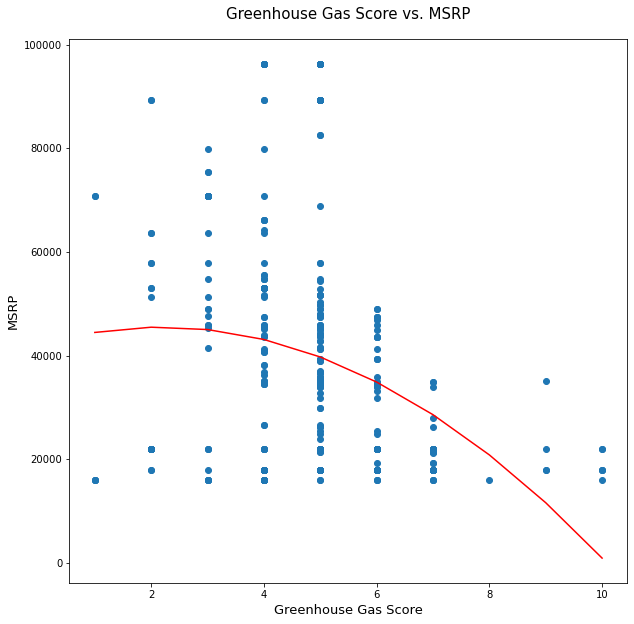

In [18]:
x = data["Greenhouse Gas Score"]
y = data["MSRP"]
plt.figure(figsize=(10,10))
plt.plot(x, y, "o")

c = polyfit(x, y, 2)
x1 = range(1,11)
plt.plot(x1, c[2]*x1*x1 + c[1]*x1 + c[0], '-', color="red")

plt.xlabel("Greenhouse Gas Score", fontsize=13)
plt.ylabel("MSRP", fontsize=13)
plt.title("Greenhouse Gas Score vs. MSRP", fontsize=15, pad= 20)
plt.show()

___

## Preliminary analysis

We then wanted to make sure that there was relation between the features of the car and the Greenhouse Gas Score. We took the data and ran different regression models on it, we used Random Forest, Support Vector Regression, and KNeighborClassifier. We chose these models because we wanted to have diverse regressions and numbers to compare. From the Random Forest Regression with 10 trees we were able to see that it had a 99% success rate. During our presentation we were asked if that number seemed too high because Random Forest is known for overfitting data. So we ran the regression again with only 1 tree and were able to still get 99%.

In [19]:
le = preprocessing.LabelEncoder()

le.fit(data.Model.unique())
data.Model = le.transform(data.Model)

le.fit(data.Trans.unique())
data.Trans = le.transform(data.Trans)


le.fit(data["Drive"].unique())
data["Drive"] = le.transform(data["Drive"])

le.fit(data.Fuel.unique())
data.Fuel = le.transform(data.Fuel)

le.fit(data["Veh Class"].unique())
data["Veh Class"] = le.transform(data["Veh Class"])

le.fit(data["SmartWay"].unique())
data["SmartWay"] = le.transform(data["SmartWay"])

le.fit(data["Make"].unique())
data["Make"] = le.transform(data["Make"])

data

,Model,Displ,Cyl,Trans,Drive,Fuel,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2,Make,Horsepower,Doors,MSRP
0,0,2.4,4.0,2,0,2,4,6,25,35,29,7,2,309,0,201.0,4.0,27990
2,1,3.0,6.0,1,1,2,3,6,26,27,27,6,1,329,0,290.0,4.0,45950
4,1,3.5,6.0,19,0,2,3,6,19,27,22,5,1,404,0,290.0,4.0,43950
5,1,3.5,6.0,19,0,2,3,6,20,27,23,5,1,391,0,290.0,4.0,43950
8,1,3.5,6.0,19,1,2,3,6,18,26,21,4,1,424,0,290.0,4.0,45950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2565,207,2.0,4.0,18,1,2,7,6,22,32,26,6,1,345,17,302.0,4.0,48950
2566,207,2.0,4.0,18,1,2,7,6,23,31,26,6,1,343,17,302.0,4.0,48950
2569,208,2.0,4.0,18,1,2,7,6,22,30,25,5,1,354,17,302.0,4.0,48950
2571,209,2.0,4.0,18,1,2,7,5,20,27,23,5,1,388,17,302.0,4.0,48950


In [20]:
labels = np.array(data['Greenhouse Gas Score'])
features = data.drop('Greenhouse Gas Score', axis = 1)
feature_list = list(features.columns)
features = np.array(features)

In [21]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [22]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 10)
rf.fit(train_features, train_labels)
rfScore = rf.score(test_features, test_labels)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(train_features, train_labels)
knnScore = knn.score(test_features, test_labels)

In [24]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(train_features, train_labels)
svrScore = svr.score(test_features, test_labels)

In [25]:
print("RF:", rfScore)
print("KNN:", knnScore)
print("SVR:", svrScore)

RF: 0.9983349353372947
KNN: 0.5922330097087378
SVR: 0.1346420462598391


In [26]:
feature_list

['Model',
 'Displ',
 'Cyl',
 'Trans',
 'Drive',
 'Fuel',
 'Veh Class',
 'Air Pollution Score',
 'City MPG',
 'Hwy MPG',
 'Cmb MPG',
 'SmartWay',
 'Comb CO2',
 'Make',
 'Horsepower',
 'Doors',
 'MSRP']

In [27]:
importances = rf.feature_importances_
importances

array([0.00000000e+00, 6.16424016e-04, 2.08912820e-04, 0.00000000e+00,
       0.00000000e+00, 1.75845577e-04, 2.28225299e-04, 2.72539715e-04,
       4.87002384e-03, 1.70578703e-03, 5.58645658e-01, 8.50090431e-03,
       4.23703482e-01, 0.00000000e+00, 3.35491190e-04, 2.87870074e-04,
       4.48836136e-04])

## Determing most important features: Greenhouse Gas Score and MSRP

Then we wanted to figure out what which features carried the most weight when it came to Green HouseHas score and MSRP. We took all the features from both and created a model using Random Forest Regression, and from there was able to get the importance of each feature in regards to Greenhouse Gas Score and MSRP. For Greenhouse Gas Score we could see that the things that affects the Greenhouse Gas Score the most were, City MPG, Comb MPG and Comb CO2(This is the CO2 emissions the car has). Comb MPG and COMB CO2 out of those three were the most influential and Comb MPG was the most influential which made sense. As the car can drive more miles per gallon, it would be using less gas therefore releasing less emissions therefore being better for the environment.
The feature that was the most influential for MSRP was Horsepower. This made sense because as cars get more and more powerful the more expensive the car is going to get. With cars being more powerful they are going to put more luxury features in a car that would also make the MSRP go up.

In [28]:
labels1 = np.array(data['Greenhouse Gas Score'])
labels2 = np.array(data['MSRP'])

features = data.drop(['Greenhouse Gas Score', 'MSRP'], axis = 1)
feature_list = list(features.columns)
features = np.array(features)

In [29]:
train_features1, test_features1, train_labels1, test_labels1 = train_test_split(features, labels1, test_size = 0.25)
train_features2, test_features2, train_labels2, test_labels2 = train_test_split(features, labels2, test_size = 0.25)

In [30]:
rf1 = RandomForestRegressor(n_estimators = 1)
rf1.fit(train_features1, train_labels1)
rfScore1 = rf1.score(test_features1, test_labels1)

rf2 = RandomForestRegressor(n_estimators = 1)
rf2.fit(train_features2, train_labels2)
rfScore2 = rf2.score(test_features2, test_labels2)

print("RF Score (Greenhouse Gas Score): ", rfScore1)
print("RF Score (MSRP): ", rfScore2)

RF Score (Greenhouse Gas Score):  0.9789322969932501
RF Score (MSRP):  0.9291410162825784


In [31]:
feature_list

['Model',
 'Displ',
 'Cyl',
 'Trans',
 'Drive',
 'Fuel',
 'Veh Class',
 'Air Pollution Score',
 'City MPG',
 'Hwy MPG',
 'Cmb MPG',
 'SmartWay',
 'Comb CO2',
 'Make',
 'Horsepower',
 'Doors']

In [32]:
#Greenhouse Gas Score
importances1 = rf1.feature_importances_
importances1

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.12726376,
       0.76365337, 0.02243167, 0.08557919, 0.        , 0.        ,
       0.00107202])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

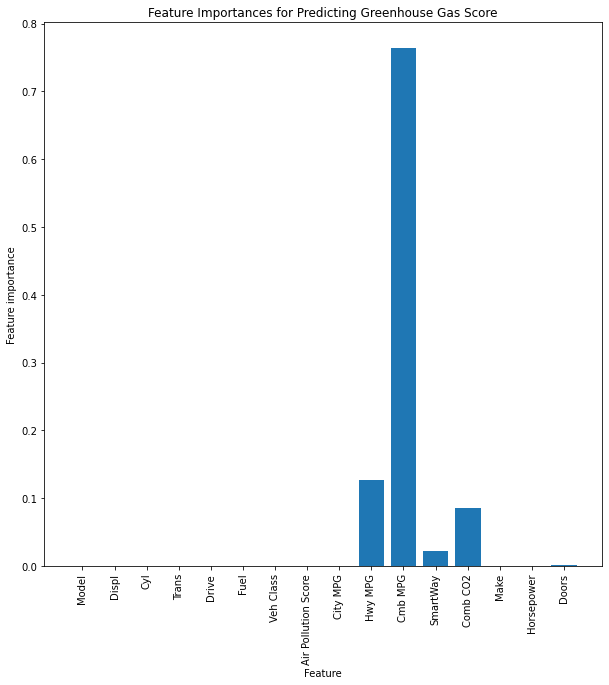

In [33]:
plt.figure(figsize=(10, 10))
plt.bar(feature_list, importances1)
plt.xlabel("Feature")
plt.ylabel("Feature importance")
plt.title("Feature Importances for Predicting Greenhouse Gas Score")
plt.xticks(rotation=90)

In [34]:
#MSRP
importances2 = rf2.feature_importances_
importances2

array([5.75996352e-03, 8.08487039e-04, 2.53024594e-04, 1.02611258e-02,
       2.51274047e-03, 0.00000000e+00, 8.18324755e-03, 2.17918851e-02,
       7.81218967e-04, 8.81943156e-05, 1.65645462e-06, 0.00000000e+00,
       5.02784176e-04, 2.94434157e-03, 9.45720696e-01, 3.90634507e-04])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

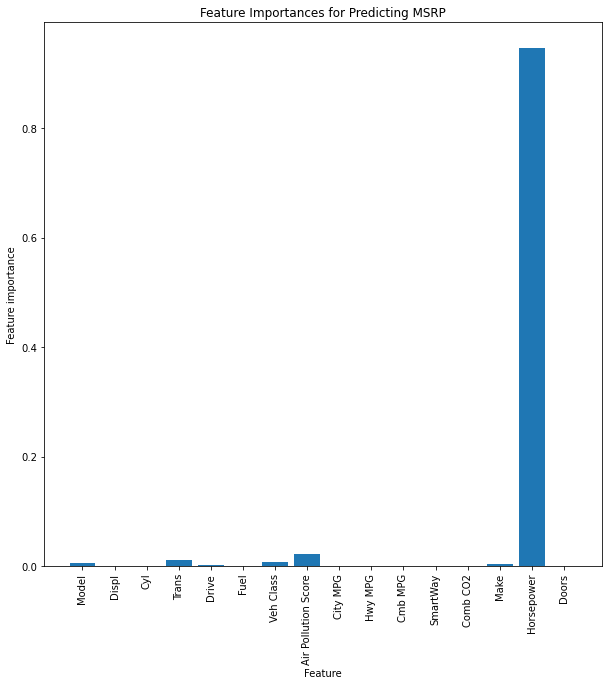

In [35]:
plt.figure(figsize=(10, 10))
plt.bar(feature_list, importances2)
plt.xlabel("Feature")
plt.ylabel("Feature importance")
plt.title("Feature Importances for Predicting MSRP")
plt.xticks(rotation=90)

___

## Most important feature analysis

We decided to analyze the importance of the features for the MSRP and Greenhouse Gas Score and specifically, we wanted to look at how Horsepower related to MSRP and we saw that as the price of the MSRP went up the values of the actual data strayed more away from the trendline value that we got from linear regression. We were able to see this from the graph that we had visualized. From the data from there, we created another visual that plotted the residual data to see where horsepower would not be a good estimate.  We found that at large MSRP the variance increased, so horsepower was not a good feature at the extreme. 

In [36]:
ggs = sorted(zip(feature_list, importances1), key= lambda t: t[1])
ggs

[('Model', 0.0),
 ('Displ', 0.0),
 ('Cyl', 0.0),
 ('Trans', 0.0),
 ('Drive', 0.0),
 ('Fuel', 0.0),
 ('Veh Class', 0.0),
 ('Air Pollution Score', 0.0),
 ('City MPG', 0.0),
 ('Make', 0.0),
 ('Horsepower', 0.0),
 ('Doors', 0.0010720209515494234),
 ('SmartWay', 0.022431671280712353),
 ('Comb CO2', 0.08557918565201522),
 ('Hwy MPG', 0.12726375652733019),
 ('Cmb MPG', 0.7636533655883929)]

In [37]:
msrp = sorted(zip(feature_list, importances2), key= lambda t: t[1])
msrp

[('Fuel', 0.0),
 ('SmartWay', 0.0),
 ('Cmb MPG', 1.6564546217106187e-06),
 ('Hwy MPG', 8.819431561978938e-05),
 ('Cyl', 0.00025302459378200655),
 ('Doors', 0.00039063450743404406),
 ('Comb CO2', 0.0005027841758842141),
 ('City MPG', 0.0007812189671878186),
 ('Displ', 0.0008084870388357459),
 ('Drive', 0.0025127404669465924),
 ('Make', 0.0029443415684409567),
 ('Model', 0.005759963524294193),
 ('Veh Class', 0.008183247553670335),
 ('Trans', 0.010261125815444966),
 ('Air Pollution Score', 0.021791885055247536),
 ('Horsepower', 0.9457206959625901)]

In [38]:
from sklearn.linear_model import LinearRegression

X = np.array(data["Horsepower"]).reshape(-1,1)
y = labels2

reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.7564393080788957

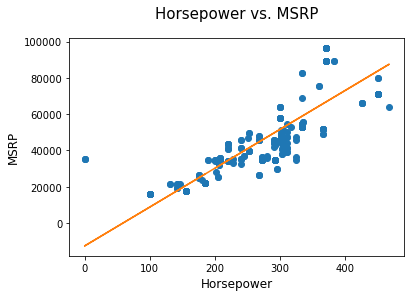

In [39]:
plt.plot(X, y, "o")
plt.title("Horsepower vs. MSRP", fontsize=15, pad= 20)
plt.xlabel("Horsepower", fontsize= 12)
plt.ylabel("MSRP", fontsize= 12)

y_pred = reg.predict(X).reshape(-1, 1)
plt.plot(X, y_pred)

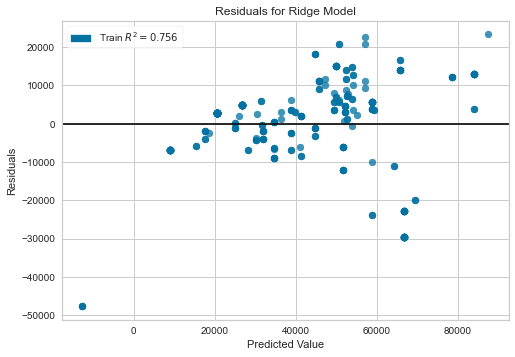

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [40]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

model = Ridge()
visualizer = ResidualsPlot(model, hist=False)

visualizer.fit(X, y)
visualizer.show()    

___

## Linear Regression

We decided to use linear regression to predict the MSRP and Greenhouse gas Score of a given car. We wanted to do this based on properties of the car and not attributes like MPG that could be directly correlated with one of the output variables (in this case Greenhouse Gas score). First, we kept only the direct properties of the car: its maker, the number of displays, the number of cycles, its fuel type, its vehicle class, its horesepower, and its number of doors. Then, we fit three linear regressions with the properties as input. The first predicted Greenhouse Gas Score, the second predicts MSRP, and the third predicts the ratio score, which is defined as $\frac{10000*GreenhouseGasScore}{MSRP}$. Our goal is to use these features to help the user make the best decision possible when purchasing a car.

Here, we filtered and preprocessed the data. We kept only the properties of the car itself that a typical car buyer would know.

In [41]:
data = epaData.copy()
featureColList = ["Make","Displ", "Cyl", "Trans", "Fuel", "Veh Class", "Greenhouse Gas Score", "Horsepower", "Doors", "MSRP"]
trimmedDat = data[featureColList]
trimmedDat.head()

,Make,Displ,Cyl,Trans,Fuel,Veh Class,Greenhouse Gas Score,Horsepower,Doors,MSRP
0,Acura,2.4,4.0,AMS-8,Gasoline,small car,7,201.0,4.0,27990
2,Acura,3.0,6.0,AMS-7,Gasoline,small SUV,6,290.0,4.0,45950
4,Acura,3.5,6.0,SemiAuto-9,Gasoline,small SUV,5,290.0,4.0,43950
5,Acura,3.5,6.0,SemiAuto-9,Gasoline,small SUV,5,290.0,4.0,43950
8,Acura,3.5,6.0,SemiAuto-9,Gasoline,small SUV,4,290.0,4.0,45950


In [42]:
trimmedDatNumbers = trimmedDat.select_dtypes(include="number")
trimmedDatNumbers.head()

,Displ,Cyl,Greenhouse Gas Score,Horsepower,Doors,MSRP
0,2.4,4.0,7,201.0,4.0,27990
2,3.0,6.0,6,290.0,4.0,45950
4,3.5,6.0,5,290.0,4.0,43950
5,3.5,6.0,5,290.0,4.0,43950
8,3.5,6.0,4,290.0,4.0,45950


In [43]:
trimmedDatCat = trimmedDat.select_dtypes(exclude="number")
trimmedDatCat.drop(["Trans"], axis= 1, inplace= True)
trimmedDatCat.head()

C:\Users\Joshua\.conda\envs\cs320\lib\site-packages\pandas\core\frame.py:4157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Make,Fuel,Veh Class
0,Acura,Gasoline,small car
2,Acura,Gasoline,small SUV
4,Acura,Gasoline,small SUV
5,Acura,Gasoline,small SUV
8,Acura,Gasoline,small SUV


Here, we converted the categorical variables into dummy variables to allow them to be used in a regression. We dropped one in each class in order to ensure that the matrix was invertible.

In [46]:
trimmedDatCatDummies = pd.get_dummies(trimmedDatCat, drop_first=True)
trimmedDatCatDummies.head()

,Make_Audi,Make_BMW,Make_Cadillac,Make_Chrysler,Make_FIAT,Make_Genesis,Make_Honda,Make_Infiniti,Make_Lexus,Make_Lincoln,...,Fuel_Electricity,Fuel_Gasoline,Veh Class_midsize car,Veh Class_pickup,Veh Class_small SUV,Veh Class_small car,Veh Class_special purpose,Veh Class_standard SUV,Veh Class_station wagon,Veh Class_van
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [47]:
trimmedDatCatDummies.columns

Index(['Make_Audi', 'Make_BMW', 'Make_Cadillac', 'Make_Chrysler', 'Make_FIAT',
       'Make_Genesis', 'Make_Honda', 'Make_Infiniti', 'Make_Lexus',
       'Make_Lincoln', 'Make_Mazda', 'Make_Nissan', 'Make_Porsche',
       'Make_Subaru', 'Make_Toyota', 'Make_Volkswagen', 'Make_Volvo',
       'Fuel_Electricity', 'Fuel_Gasoline', 'Veh Class_midsize car',
       'Veh Class_pickup', 'Veh Class_small SUV', 'Veh Class_small car',
       'Veh Class_special purpose', 'Veh Class_standard SUV',
       'Veh Class_station wagon', 'Veh Class_van'],
      dtype='object')

In [48]:
finalDat = pd.concat([trimmedDatNumbers,trimmedDatCatDummies], axis=1)
finalDat.head()

,Displ,Cyl,Greenhouse Gas Score,Horsepower,Doors,MSRP,Make_Audi,Make_BMW,Make_Cadillac,Make_Chrysler,...,Fuel_Electricity,Fuel_Gasoline,Veh Class_midsize car,Veh Class_pickup,Veh Class_small SUV,Veh Class_small car,Veh Class_special purpose,Veh Class_standard SUV,Veh Class_station wagon,Veh Class_van
0,2.4,4.0,7,201.0,4.0,27990,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,3.0,6.0,6,290.0,4.0,45950,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,3.5,6.0,5,290.0,4.0,43950,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
5,3.5,6.0,5,290.0,4.0,43950,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
8,3.5,6.0,4,290.0,4.0,45950,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [49]:
finalDat.drop(["Greenhouse Gas Score", "MSRP"],axis=1).columns

Index(['Displ', 'Cyl', 'Horsepower', 'Doors', 'Make_Audi', 'Make_BMW',
       'Make_Cadillac', 'Make_Chrysler', 'Make_FIAT', 'Make_Genesis',
       'Make_Honda', 'Make_Infiniti', 'Make_Lexus', 'Make_Lincoln',
       'Make_Mazda', 'Make_Nissan', 'Make_Porsche', 'Make_Subaru',
       'Make_Toyota', 'Make_Volkswagen', 'Make_Volvo', 'Fuel_Electricity',
       'Fuel_Gasoline', 'Veh Class_midsize car', 'Veh Class_pickup',
       'Veh Class_small SUV', 'Veh Class_small car',
       'Veh Class_special purpose', 'Veh Class_standard SUV',
       'Veh Class_station wagon', 'Veh Class_van'],
      dtype='object')

In [50]:
X = finalDat.drop(["Greenhouse Gas Score", "MSRP"],axis=1).to_numpy()
y_gg = finalDat["Greenhouse Gas Score"].to_numpy()
y_msrp = finalDat["MSRP"].to_numpy()
y_ratio = (10000*y_gg)/y_msrp

Here, we use Linear Regression predicted the Greenhouse Gas Score based on the physical properties of the car. We got an $R^2$ of 0.72, showing that our model has great predictive power.

In [51]:
X_train_gg, X_test_gg, y_train_gg, y_test_gg = train_test_split(X, y_gg)
LReg_gg = LinearRegression()
LReg_gg.fit(X_train_gg, y_train_gg)
gg_score = LReg_gg.score(X_test_gg, y_test_gg)
print(f"Greenhouse Gas R^2: {gg_score}")

Greenhouse Gas R^2: 0.7194861565687588


Here, we use linear regression to predict the MSRP based on the physical properties of the car. We get an $R^2$ of 0.98, which means that this is an excellent model.

In [52]:
X_train_msrp, X_test_msrp, y_train_msrp, y_test_msrp = train_test_split(X, y_msrp)
LReg_msrp = LinearRegression()
LReg_msrp.fit(X_train_msrp, y_train_msrp)
msrp_score = LReg_msrp.score(X_test_msrp, y_test_msrp)
print(f"MSRP R^2: {msrp_score}")

MSRP R^2: 0.9779519119430287


Here, we use the physical properties of the car to predict the ratio score, which we define as $\frac{10000*GreenhouseGasScore}{MSRP}$. We included this to try to come up with a single number to help the user evaluate how environmetnally friendly their car is per dollar. It achieves an $R^2$ of about .9, showing that this model performs very well. However, this is a very simple metric that was not verified, so this high $R^2$ could have arisen becaues one variable is larger than the other and the model just predicts this. More research is needed to determine the value of this metric.

In [53]:
X_train_ratio, X_test_ratio, y_train_ratio, y_test_ratio = train_test_split(X, y_ratio)
LReg_ratio = LinearRegression()
LReg_ratio.fit(X_train_ratio, y_train_ratio)
ratio_score = LReg_ratio.score(X_test_ratio, y_test_ratio)
print(f"Ratio Score: {ratio_score}")

Ratio Score: 0.8946497420112591


___

## Interactive Advice System

The main goal of our project is to offer advice to a prospective car buyer about what they should expect for the MSRP and, what we call, Greenhouse Gas Score for specific features of a car they are interested in. The basic functionality will work as follows:
1. The prospective car buyer will determine which features/characteristics of a car they are looking for. This includes the engine volume, number of engine cylinders, horsepower, number of doors, fuel type, make, and car classification.
2. The car buyer will input their answers to their desired feature.
3. Our project will output an MSRP and Greenhouse Gas Score that they should expect from a car with those features.

While one could understand the derivation of this output by understanding the notebook above, we will put more meaning and context to this information we provided.

* The Greenhouse Gas Score is a rating on a scale from 1-10 that reflects vehicle tailpipe emissions of carbon dioxide (CO2), the most prevalent greenhouse gas (GHG). CO2 emissions typically constitute 99% of the tailpipe emissions of greenhouse gases. Vehicles that score a 10 on the GHG score are the cleanest.
* We compared MSRP and Greenhouse Gas Score trends of cars models manufactured in 2017 to determine what the typical market looks like, and we eventually derived a ratio that represents a good deal.

With this information, we give advice on a car buyers specific purchase in order for them to interpret if the deal they have been offered is reasonable with the rest of market trends in 2017.

In [54]:
import ipywidgets as widgets

In [55]:
def gg(arr):
    coef = [-9.52022469e-02, -5.24319264e-01, -3.06866870e-03, -2.23426968e-01,
       -1.01798049e+00, -1.14800539e+00, -1.09966754e+00, -8.20077779e-01,
       -1.02112917e+00, -1.45914609e+00,  1.19838709e-01, -5.69784793e-01,
       -1.03259482e+00, -1.21983211e+00, -8.25566171e-01, -9.89946141e-01,
       -8.52830942e-01, -1.88693691e+00, -6.71092375e-01, -1.77551635e+00,
       -1.00215554e+00, -6.32671026e-02, -1.42705432e+00,  6.25658640e-02,
       -1.38120910e+00, -7.06166053e-01, -3.25695150e-01, -1.32300350e+00,
       -9.29552793e-01, -6.71142114e-01, -3.35264843e+00]
    
    s = 12.32338898861483
    for i in range(len(arr)):
        s += arr[i] * coef[i]
        
    return s

In [56]:
def MSRP(arr):
    coef = [-1763.49743744,  1278.83676302,   135.32062554,  1625.85135542,
        6272.23661082,  5210.3140468 , -1481.2456218 , -9581.18474288,
        -651.13618708, -7206.75221639,  -680.29854694, -1525.13492899,
       10906.37557533, -3955.84139725, -8252.06627068, -1362.8934575 ,
       42848.08478269, -8990.07343869, -1355.58986363,  3584.61850642,
        4699.11877325,   512.17254264, -1888.87595726,  -990.77503615,
        -189.78481588, -3793.92551353, -3998.5776153 , -2858.94248901,
         892.84921349, -6372.44314247,   339.26441535]
    
    s = 1621.9523588909578
    for i in range(len(arr)):
        s += arr[i] * coef[i]
        
    return s

In [57]:
style = {'description_width': 'initial'}
displ = widgets.BoundedFloatText(description='Engine Displacement in Liters', min="0.6", max="6.2", step="0.1", style= style)
cyl = widgets.BoundedFloatText(description='Number of Engine Cylinders', min="2", max="12", step="1", style= style)
hp = widgets.BoundedFloatText(description='Horsepower', min="100", max="610", step="1", style= style)
doors = widgets.BoundedFloatText(description='Number of Doors', min="2", max="4", step="1", style= style)

fuel = widgets.Dropdown(
    options=[('Diesel', 0), ('Electricity', 1), ('Gasoline', 2)],
    description='Fuel Type:',
)

make = widgets.Dropdown(
    options = [('Acura', 0), ('Audi', 1), ('BMW', 2), 
               ('Cadillac', 3), ('Chrysler', 4), ('FIAT', 5),  ('Genesis', 6), ('Honda', 7), ('Infiniti', 8), ('Lexus', 9), 
               ('Lincoln', 10), ('Mazda', 11), ('Nissan', 12),
               ('Porsche', 13), ('Subaru',14), ('Toyota',15), ('Volkswagen',16), ('Volvo', 17)],
    description="Make:",
)

veh = widgets.Dropdown(
    options = [('large car', 0), ('midsize car', 1), ('pickup', 2), ('small SUV', 3), ('small car', 4), 
               ('special purpose', 5), ('standard SUV', 6), ('station wagon', 7), ('van', 8)],
    description= "Vehicle Class"
)


def f1(displ, cyl, hp, doors, fuel, make, veh):
    arr = [0 for i in range(len(LReg_gg.coef_))]
    arr[0] = displ
    arr[1] = cyl
    arr[2] = hp
    arr[3] = doors
    if make != 0:
        arr[3+make] = 1
    if fuel != 0:
        arr[20 + fuel] = 1
    if veh != 0:
        arr[22 + veh] = 1
    print('Expected MSRP: $', round(MSRP(arr), 2))

def f2(displ, cyl, hp, doors, fuel, make, veh):
    arr = [0 for i in range(len(LReg_gg.coef_))]
    arr[0] = displ
    arr[1] = cyl
    arr[2] = hp
    arr[3] = doors
    if make != 0:
        arr[3+make] = 1
    if fuel != 0:
        arr[20 + fuel] = 1
    if veh != 0:
        arr[22 + veh] = 1
    print('\tExpected Greenhouse Gas Score: ', round(gg(arr), 2))
    
out1 = widgets.interactive_output(f1, {'displ': displ, 'cyl': cyl, 'hp': hp, 'doors': doors, 'fuel': fuel, 'make': make, 'veh': veh})
out2 = widgets.interactive_output(f2, {'displ': displ, 'cyl': cyl, 'hp': hp, 'doors': doors, 'fuel': fuel, 'make': make, 'veh': veh})

widgets.HBox([widgets.VBox([displ, cyl, hp, doors, fuel, make, veh]), out1, out2])